Name : Kaustubh Arun Shingana
Roll Number : E21008

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import math as m
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings 
warnings.filterwarnings("ignore") 
from scipy import stats
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = yf.download("^NSEBANK ^GSPC ^DJI  ^VIX ^N225 ^HSI ^STI ^BSESN ^FTSE ^RUT ", start="2000-01-01", end="2021-06-09",group_by='column',progress=True)
df.head()

[*********************100%***********************]  10 of 10 completed


Adj Close                                                        \
                 ^BSESN          ^DJI        ^FTSE        ^GSPC          ^HSI   
Date                                                                            
1999-12-31          NaN  11497.120117          NaN  1469.250000           NaN   
2000-01-03  5375.109863  11357.509766          NaN  1455.219971  17369.630859   
2000-01-04  5491.009766  10997.929688  6665.899902  1399.420044  17072.820312   
2000-01-05  5357.000000  11122.650391  6535.899902  1402.109985  15846.719727   
2000-01-06  5421.529785  11253.259766  6447.200195  1403.449951  15153.230469   

                                                                       ...  \
                   ^N225 ^NSEBANK        ^RUT         ^STI       ^VIX  ...   
Date                                                                   ...   
1999-12-31           NaN      NaN  504.750000          NaN  24.639999  ...   
2000-01-03           NaN      NaN  496.420013  2582.939941  24.209999  ...   
2000-01-04  19002.859375      NaN  478.380005  2530.149902  27.010000  ...   
2000-01-05  18542.550781      NaN  478.829987  2391.030029  26.410000  ...   
2000-01-06  18168.269531      NaN  475.339996  2359.209961  25.730000  ...   

           Volume                                                              \
           ^BSESN         ^DJI        ^FTSE         ^GSPC ^HSI ^N225 ^NSEBANK   
Date                                                                            
1999-12-31    NaN   43620000.0          NaN  3.740500e+08  NaN   NaN      NaN   
2000-01-03    0.0  169750000.0          NaN  9.318000e+08  0.0   NaN      NaN   
2000-01-04    0.0  178420000.0  633449000.0  1.009000e+09  0.0   0.0      NaN   
2000-01-05    0.0  203190000.0  670234000.0  1.085500e+09  0.0   0.0      NaN   
2000-01-06    0.0  176550000.0  785532000.0  1.092300e+09  0.0   0.0      NaN   

                                            
                    ^RUT         ^STI ^VIX  
Date                                        
1999-12-31  3.740500e+08          NaN  0.0  
2000-01-03  9.318000e+08  136840100.0  0.0  
2000-01-04  1.009000e+09  196388500.0  0.0  
2000-01-05  1.085500e+09  171041500.0  0.0  
2000-01-06  1.092300e+09  132207200.0  0.0  

[5 rows x 60 columns]

In [149]:
df_corr["DJI_close"] = df["Adj Close"]["^DJI"]
DJI_close.dropna(inplace=True)
df_corr["DJI_close"].head()

Date
2007-09-18    13739.389648
2007-09-19    13815.559570
2007-09-20    13766.700195
2007-09-21    13820.190430
2007-09-25    13778.650391
Name: DJI_close, dtype: float64

In [150]:
df_corr["BNF_open"] = df["Open"]["^NSEBANK"]
BNF_open.diff()
BNF_open.dropna(inplace=True)
BNF_open.head()

Date
2007-09-17    6898.000000
2007-09-18    6921.149902
2007-09-19    7111.000000
2007-09-20    7404.950195
2007-09-21    7378.299805
Name: ^NSEBANK, dtype: float64

In [3]:
df_adjclose = df["Adj Close"]
df_adjclose.dropna(inplace=True)
df_adjclose.head()

^BSESN          ^DJI        ^FTSE        ^GSPC  \
Date                                                               
2007-09-18  15669.120117  13739.389648  6283.299805  1519.780029   
2007-09-19  16322.750000  13815.559570  6460.000000  1529.030029   
2007-09-20  16347.950195  13766.700195  6429.000000  1518.750000   
2007-09-21  16564.230469  13820.190430  6456.700195  1525.750000   
2007-09-25  16899.539062  13778.650391  6396.899902  1517.209961   

                    ^HSI         ^N225     ^NSEBANK        ^RUT         ^STI  \
Date                                                                           
2007-09-18  24576.849609  15801.799805  7059.649902  806.630005  3477.750000   
2007-09-19  25554.640625  16381.540039  7401.850098  817.400024  3594.360107   
2007-09-20  25701.130859  16413.789062  7390.149902  809.760010  3552.459961   
2007-09-21  25843.779297  16312.610352  7464.500000  813.109985  3542.219971   
2007-09-25  26430.289062  16401.730469  7629.149902  803.000000  3624.820068   

                 ^VIX  
Date                   
2007-09-18  20.350000  
2007-09-19  20.030001  
2007-09-20  20.450001  
2007-09-21  19.000000  
2007-09-25  18.600000

In [148]:
df_corr= df_adjclose[["^NSEBANK", "^DJI" , "^VIX"]]
df_corr.head()

^NSEBANK          ^DJI       ^VIX
Date                                            
2007-09-18  7059.649902  13739.389648  20.350000
2007-09-19  7401.850098  13815.559570  20.030001
2007-09-20  7390.149902  13766.700195  20.450001
2007-09-21  7464.500000  13820.190430  19.000000
2007-09-25  7629.149902  13778.650391  18.600000

In [5]:
len(df_corr)

2629

In [151]:
df_corr

^NSEBANK          ^DJI       ^VIX     DJI_close      BNF_open
Date                                                                         
2007-09-18   7059.649902  13739.389648  20.350000  13739.389648   6921.149902
2007-09-19   7401.850098  13815.559570  20.030001  13815.559570   7111.000000
2007-09-20   7390.149902  13766.700195  20.450001  13766.700195   7404.950195
2007-09-21   7464.500000  13820.190430  19.000000  13820.190430   7378.299805
2007-09-25   7629.149902  13778.650391  18.600000  13778.650391   7658.500000
...                  ...           ...        ...           ...           ...
2021-06-02  35373.750000  34600.378906  17.480000  34600.378906  35271.601562
2021-06-03  35649.000000  34577.039062  18.040001  34577.039062  35536.449219
2021-06-04  35291.648438  34756.390625  16.420000  34756.390625  35657.851562
2021-06-07  35443.648438  34630.238281  16.420000  34630.238281  35460.800781
2021-06-08  35085.300781  34599.820312  17.070000  34599.820312  35433.800781

[2629 rows x 5 columns]

In [7]:
correlation = df_corr["^NSEBANK"].corr(df_corr["^DJI"])
correlation

0.9603858236710021

In [8]:
df_corr["returns_BNF"] = df_corr["^NSEBANK"].pct_change()
df_corr["returns_DJI"] = df_corr["^DJI"].pct_change()
df_corr["returns_VIX"] = df_corr["^VIX"].pct_change()

In [9]:
df_temp = df
df_temp 

Adj Close                                          \
                  ^BSESN          ^DJI        ^FTSE        ^GSPC   
Date                                                               
1999-12-31           NaN  11497.120117          NaN  1469.250000   
2000-01-03   5375.109863  11357.509766          NaN  1455.219971   
2000-01-04   5491.009766  10997.929688  6665.899902  1399.420044   
2000-01-05   5357.000000  11122.650391  6535.899902  1402.109985   
2000-01-06   5421.529785  11253.259766  6447.200195  1403.449951   
...                  ...           ...          ...          ...   
2021-06-02  51849.480469  34600.378906  7108.000000  4208.120117   
2021-06-03  52232.429688  34577.039062  7064.399902  4192.850098   
2021-06-04  52100.050781  34756.390625  7069.000000  4229.890137   
2021-06-07  52328.511719  34630.238281  7077.200195  4226.520020   
2021-06-08  52275.570312  34599.820312  7095.100098  4227.259766   

                                                                   \
                    ^HSI         ^N225      ^NSEBANK         ^RUT   
Date                                                                
1999-12-31           NaN           NaN           NaN   504.750000   
2000-01-03  17369.630859           NaN           NaN   496.420013   
2000-01-04  17072.820312  19002.859375           NaN   478.380005   
2000-01-05  15846.719727  18542.550781           NaN   478.829987   
2000-01-06  15153.230469  18168.269531           NaN   475.339996   
...                  ...           ...           ...          ...   
2021-06-02  29297.619141  28946.140625  35373.750000  2297.830078   
2021-06-03  28966.029297  29058.109375  35649.000000  2279.250000   
2021-06-04  28918.099609  28941.519531  35291.648438  2286.409912   
2021-06-07  28787.279297  29019.240234  35443.648438  2319.179932   
2021-06-08  28781.380859  28963.560547  35085.300781  2343.760010   

                                    ...   Volume                            \
                   ^STI       ^VIX  ...   ^BSESN         ^DJI        ^FTSE   
Date                                ...                                      
1999-12-31          NaN  24.639999  ...      NaN   43620000.0          NaN   
2000-01-03  2582.939941  24.209999  ...      0.0  169750000.0          NaN   
2000-01-04  2530.149902  27.010000  ...      0.0  178420000.0  633449000.0   
2000-01-05  2391.030029  26.410000  ...      0.0  203190000.0  670234000.0   
2000-01-06  2359.209961  25.730000  ...      0.0  176550000.0  785532000.0   
...                 ...        ...  ...      ...          ...          ...   
2021-06-02  3161.040039  17.480000  ...  13500.0  263810000.0  570341500.0   
2021-06-03  3165.000000  18.040001  ...  15000.0  297380000.0  617182900.0   
2021-06-04  3151.040039  16.420000  ...  16700.0  270050000.0  425216000.0   
2021-06-07  3175.810059  16.420000  ...  19800.0  259120000.0  963131300.0   
2021-06-08  3167.139893  17.070000  ...  12300.0  289440000.0  550005100.0   

                                                                           \
                   ^GSPC          ^HSI       ^N225 ^NSEBANK          ^RUT   
Date                                                                        
1999-12-31  3.740500e+08           NaN         NaN      NaN  3.740500e+08   
2000-01-03  9.318000e+08  0.000000e+00         NaN      NaN  9.318000e+08   
2000-01-04  1.009000e+09  0.000000e+00         0.0      NaN  1.009000e+09   
2000-01-05  1.085500e+09  0.000000e+00         0.0      NaN  1.085500e+09   
2000-01-06  1.092300e+09  0.000000e+00         0.0      NaN  1.092300e+09   
...                  ...           ...         ...      ...           ...   
2021-06-02  4.860930e+09  1.933160e+09  71000000.0      0.0  4.860930e+09   
2021-06-03  4.579450e+09  2.241752e+09  58500000.0      0.0  4.579450e+09   
2021-06-04  3.487070e+09  3.054580e+09  55800000.0      0.0  3.487070e+09   
2021-06-07  3.835570e+09  2.573174e+09  51000000.0      0.0  3.835570e+09   
2

In [10]:
px.line(data_frame=df_corr[["^NSEBANK","^DJI"]],height=500,width=1000,title="Portfolio")

## Project Approach :
 - Test for Stationarity
 - Set benchmark model as Naive model
 - First order Differencing
 - Compute ACF & PACF for lag factors
 - fitting Models :
     - AR
     - MA
     - ARMA
     - ARIMA
     - ARIMAX
     - Using Information Criteria (AIC & BIC) to choose best model
 - Forecast for Weekly BankNifty Range

### Test of Stationarity

###  Dickey-Fuller test :

here we calculate how strongly a time series is defined by a trend. and  given by below hypothesis tests

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

 - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

 - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [11]:
BNF_DJ = (df_temp["Adj Close"])
BNF_DJ = BNF_DJ[["^NSEBANK", "^DJI"]]
BNF_DJ.dropna(inplace=True)
BNF_DJ.head(3)

^NSEBANK          ^DJI
Date                                 
2007-09-17  6897.100098  13403.419922
2007-09-18  7059.649902  13739.389648
2007-09-19  7401.850098  13815.559570

In [12]:
X = BNF_DJ["^NSEBANK"]
X.head(3)

Date
2007-09-17    6897.100098
2007-09-18    7059.649902
2007-09-19    7401.850098
Name: ^NSEBANK, dtype: float64

In [13]:
adf_test = adfuller(X)
adf_test

(-0.28930334456884105,
 0.9270056954669322,
 17,
 2992,
 {'1%': -3.432537472983712,
  '5%': -2.8625064838167327,
  '10%': -2.5672844849053806},
 42474.18099607899)

In [14]:
Test_stat = adf_test[0]
Test_stat

-0.28930334456884105

Test_stat > Critical Levels :  Fail to reject Null Hypothesis, hence the Time Series is not stationary

In [15]:
P_val = adf_test[1]
P_val

0.9270056954669322

Here, P Value is greater than 0.05, Hence Null Hypothesis Fails to reject, indicating that the Time Series is not Stationary

##### Before we proceed further, we need to make the Time Series Stationary, Below are the Methods that can be used to make the Time series Stationary

 - Differencing
 - Log transformation
 - Taking Sq. Root of the Time Series
 - Proportional Changes in Time Series

##### Differencing TS

Yt = (Yt) - (Yt-1)

In [16]:
df_stationary = X.diff().dropna()
df_stationary.head(3)

Date
2007-09-18    162.549805
2007-09-19    342.200195
2007-09-20    -11.700195
Name: ^NSEBANK, dtype: float64

In [17]:
adf_test = adfuller(df_stationary)
adf_test

(-12.241057298697461,
 1.0023495984952481e-22,
 16,
 2992,
 {'1%': -3.432537472983712,
  '5%': -2.8625064838167327,
  '10%': -2.5672844849053806},
 42458.948182645974)

here, after differencing Pval < 0.05, hence Reject to Null Hypothesis, indicating the Time Series is Stationary now

In [18]:
adf_test_dj = adfuller(BNF_DJ["^DJI"])
adf_test_dj

(1.3288031501541706,
 0.9967654365413933,
 29,
 2980,
 {'1%': -3.4325462892049194,
  '5%': -2.8625103776222067,
  '10%': -2.5672865579253186},
 40682.81635045804)

P_val > 0.05, hence Time series is not stationary

taking first order difference to make time series Stationary

In [19]:
df_stationarity_DJ = BNF_DJ["^DJI"]
df_stationarity_DJ = df_stationarity_DJ.diff().dropna()
df_stationarity_DJ.head()

Date
2007-09-18    335.969727
2007-09-19     76.169922
2007-09-20    -48.859375
2007-09-21     53.490234
2007-09-24    -61.130859
Name: ^DJI, dtype: float64

In [20]:
adf_stationarity_DJ = adfuller(df_stationarity_DJ)
adf_stationarity_DJ

(-11.474121013687139,
 5.180843347547539e-21,
 28,
 2980,
 {'1%': -3.4325462892049194,
  '5%': -2.8625103776222067,
  '10%': -2.5672865579253186},
 40669.88238975063)

here, after differencing Pval < 0.05, hence Reject to Null Hypothesis, indicating the Time Series is Stationary

In [21]:
y_train = BNF_DJ[:2000]
y_test = BNF_DJ[2000:]
y_hat = y_test.copy()

In [22]:
from pandas.tseries.frequencies import to_offset

In [23]:
freq = to_offset('1D')

In [24]:
freq = pd.date_range('2000-01-01', periods=0, freq='1D').freq

#### Simple moving Average

subsetting series in 6 month rolling and 12 Month Rolling Time Frame so we can calculate the Simple Moving Average

In [25]:
SMA_1 = int(input("Please enter SMA_1 Value : "))
SMA_2 = int(input("Please enter SMA_2 Value : "))

Please enter SMA_1 Value : 6
Please enter SMA_2 Value : 12


In [26]:
BNF_DJ['BNF 6 month SMA'] = BNF_DJ['^NSEBANK'].rolling(window=SMA_1).mean()

In [27]:
BNF_DJ['BNF 12 month SMA'] = BNF_DJ['^NSEBANK'].rolling(window=SMA_2).mean()

In [28]:
BNF_DJ.tail()

^NSEBANK          ^DJI  BNF 6 month SMA  BNF 12 month SMA
Date                                                                     
2021-06-02  35373.750000  34600.378906     35048.941406      34520.462240
2021-06-03  35649.000000  34577.039062     35213.441406      34702.941406
2021-06-04  35291.648438  34756.390625     35314.682943      34817.045573
2021-06-07  35443.648438  34630.238281     35372.782552      34963.583008
2021-06-08  35085.300781  34599.820312     35363.424479      35109.478841

In [29]:
RMSE_SMA = BNF_DJ
RMSE_SMA.dropna(inplace=True)

In [30]:
RMSE_6M = np.sqrt(mean_squared_error(BNF_DJ["^NSEBANK"], BNF_DJ["BNF 6 month SMA"]))
RMSE_6M

388.17041464564676

In [31]:
RMSE_12M = np.sqrt(mean_squared_error(BNF_DJ["^NSEBANK"], BNF_DJ["BNF 12 month SMA"]))
RMSE_12M

602.6242104373163

## Exponential Weighted Moving Average

In [32]:
BNF_DJ['6 EWMA'] = BNF_DJ["^NSEBANK"].ewm(span=6).mean()

In [33]:
BNF_DJ['12 EWMA'] = BNF_DJ["^NSEBANK"].ewm(span=12).mean()

In [137]:
BNF_DJ.dropna(inplace=True)
BNF_DJ

^NSEBANK          ^DJI  BNF 6 month SMA  BNF 12 month SMA  \
Date                                                                        
2007-10-03   8097.899902  13968.049805      7891.049967       7600.870809   
2007-10-04   8035.899902  13974.309570      7958.841634       7695.770793   
2007-10-05   7845.250000  14066.009766      7973.733317       7761.237467   
2007-10-08   7626.399902  14043.730469      7939.191650       7779.949951   
2007-10-09   7895.850098  14164.530273      7914.799967       7822.091634   
...                  ...           ...              ...               ...   
2021-06-02  35373.750000  34600.378906     35048.941406      34520.462240   
2021-06-03  35649.000000  34577.039062     35213.441406      34702.941406   
2021-06-04  35291.648438  34756.390625     35314.682943      34817.045573   
2021-06-07  35443.648438  34630.238281     35372.782552      34963.583008   
2021-06-08  35085.300781  34599.820312     35363.424479      35109.478841   

                  6 EWMA       12 EWMA  Simple_naive  
Date                                                  
2007-10-03   8097.899902   8097.899902      0.000000  
2007-10-04   8061.733236   8064.316569   8097.899902  
2007-10-05   7964.415084   7978.814837   8035.899902  
2007-10-08   7833.852914   7867.571214   7845.250000  
2007-10-09   7855.612194   7875.254486   7626.399902  
...                  ...           ...           ...  
2021-06-02  35037.359572  34555.884226  35337.199219  
2021-06-03  35212.113980  34724.055884  35373.750000  
2021-06-04  35234.838111  34811.377815  35649.000000  
2021-06-07  35294.498204  34908.650219  35291.648438  
2021-06-08  35234.727512  34935.827228  35443.648438  

[2999 rows x 7 columns]

In [35]:
RMSE_EWMA = BNF_DJ
RMSE_EWMA.dropna()

^NSEBANK          ^DJI  BNF 6 month SMA  BNF 12 month SMA  \
Date                                                                        
2007-10-03   8097.899902  13968.049805      7891.049967       7600.870809   
2007-10-04   8035.899902  13974.309570      7958.841634       7695.770793   
2007-10-05   7845.250000  14066.009766      7973.733317       7761.237467   
2007-10-08   7626.399902  14043.730469      7939.191650       7779.949951   
2007-10-09   7895.850098  14164.530273      7914.799967       7822.091634   
...                  ...           ...              ...               ...   
2021-06-02  35373.750000  34600.378906     35048.941406      34520.462240   
2021-06-03  35649.000000  34577.039062     35213.441406      34702.941406   
2021-06-04  35291.648438  34756.390625     35314.682943      34817.045573   
2021-06-07  35443.648438  34630.238281     35372.782552      34963.583008   
2021-06-08  35085.300781  34599.820312     35363.424479      35109.478841   

                  6 EWMA       12 EWMA  
Date                                    
2007-10-03   8097.899902   8097.899902  
2007-10-04   8061.733236   8064.316569  
2007-10-05   7964.415084   7978.814837  
2007-10-08   7833.852914   7867.571214  
2007-10-09   7855.612194   7875.254486  
...                  ...           ...  
2021-06-02  35037.359572  34555.884226  
2021-06-03  35212.113980  34724.055884  
2021-06-04  35234.838111  34811.377815  
2021-06-07  35294.498204  34908.650219  
2021-06-08  35234.727512  34935.827228  

[2999 rows x 6 columns]

In [36]:
RMSE_6M = np.sqrt(mean_squared_error(RMSE_EWMA["^NSEBANK"], RMSE_EWMA["6 EWMA"]))
RMSE_6M

323.4456526521976

In [37]:
RMSE_12M = np.sqrt(mean_squared_error(RMSE_EWMA["^NSEBANK"], RMSE_EWMA["12 EWMA"]))
RMSE_12M

515.4030280903992

### Set benchmark model as Naive model

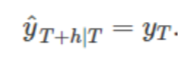

In [38]:
Simple_naive = [0]
for i in BNF_DJ['^NSEBANK']:
    if i==BNF_DJ['^NSEBANK'][len(BNF_DJ['^NSEBANK'])-1]:
        break
    Simple_naive.append(i)
BNF_DJ['Simple_naive'] = Simple_naive

In [39]:
RMSE_naive = np.sqrt(mean_squared_error(BNF_DJ["^NSEBANK"], BNF_DJ["Simple_naive"]))
RMSE_naive

337.3533874154227

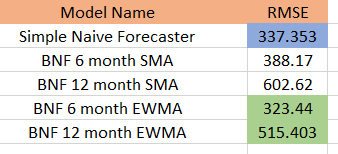

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.model_selection import train_test_split

## SimpleExponential Smoothning model with provided Alpha

In [42]:
len(BNF_DJ['^NSEBANK'])

2999

In [43]:
train = BNF_DJ['^NSEBANK'].iloc[0:2000]
train.head()

Date
2007-10-03    8097.899902
2007-10-04    8035.899902
2007-10-05    7845.250000
2007-10-08    7626.399902
2007-10-09    7895.850098
Name: ^NSEBANK, dtype: float64

In [44]:
test = BNF_DJ['^NSEBANK'].iloc[2000:]
test.head()

Date
2017-04-07    21431.150391
2017-04-10    21520.150391
2017-04-11    21736.150391
2017-04-12    21666.800781
2017-04-13    21686.599609
Name: ^NSEBANK, dtype: float64

In [45]:
y_hat = test.copy

In [46]:
# fit a SES without specifying smooth parameter, so library does it for us
fitx = SimpleExpSmoothing(np.asarray(train)).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])
alpha_fitx = fitx.model.params['smoothing_level']

optimal alpha chosen: 0.995


In [47]:
# fit a SES with explicitly supplied smooth parameter
alpha_fit2 = float(input("Alpha for model_2 : "))
fit2 = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=alpha_fit2, optimized=False)

Alpha for model_2 : 0.7


In [48]:
# print the rmse of training step
rms_train_opt = m.sqrt(mean_squared_error(train, fitx.fittedvalues)) 
print('rmse for fitted values with optimal alpha: ', rms_train_opt)
rms_train = m.sqrt(mean_squared_error(train, fit2.fittedvalues)) 
print('rmse for fitted values with supplied alpha: ', rms_train)

rmse for fitted values with optimal alpha:  217.87229389925582
rmse for fitted values with supplied alpha:  233.55211257648358


In [143]:
fit2.fittedvalues

array([ 8097.89990234,  8097.89990234,  8054.49990234, ...,
       21470.60241784, 21524.60572535, 21614.27117073])

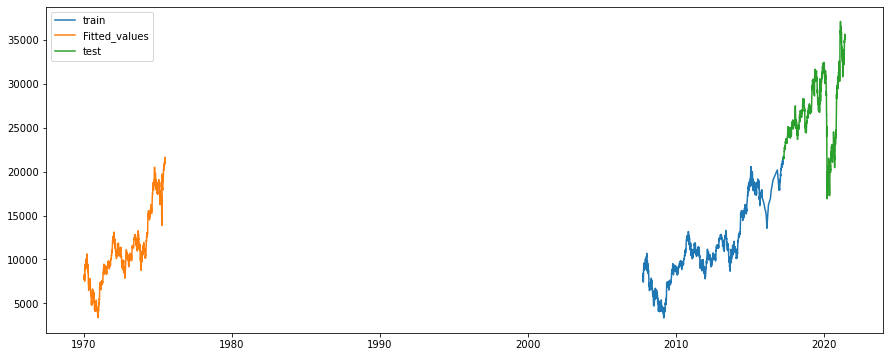

In [141]:
# plot the time series as train, test and forecasted
plt.figure(figsize=(15,6))
plt.plot(train, label='train')
plt.plot(fit2.fittedvalues, label='Fitted_values')
plt.plot(test, label='test')
plt.legend(loc='best')
plt.show()

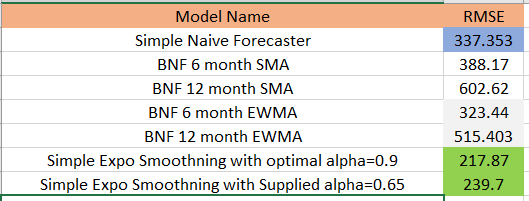

### Holt’s Linear Model (Double Exp Smoothening)

Here We will fit three examples again. 1. In fit1 we again choose not to use the optimizer and provide explicit values for α=0.8 and β=0.2 2. In fit2 we do the same as in fit1 but choose to use an exponential model rather than a Holt’s additive model. 3. In fit3 we used a damped versions of the Holt’s additive model but allow the dampening parameter ϕ to be optimized while fixing the values for α=0.8 and β=0.2

In [50]:
fit11 = Holt(BNF_DJ["^NSEBANK"], initialization_method="estimated").fit(smoothing_level=0.9, smoothing_trend=0.2,optimized=True)

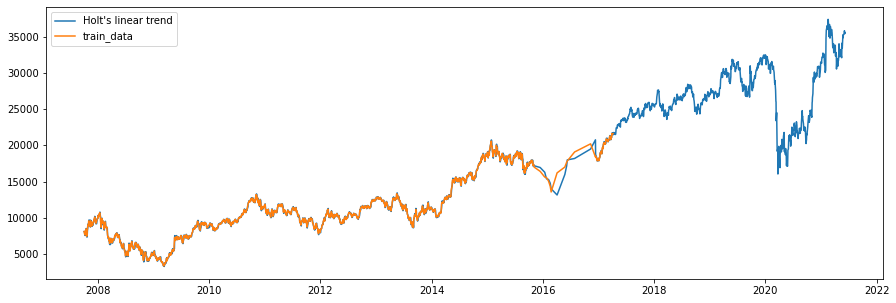

In [51]:
# plot training data against fitted values using all models
plt.figure(figsize=(15,5))
plt.plot(fit11.fittedvalues, label = "Holt's linear trend")
plt.plot(train, label='train_data')
plt.legend(loc='best')
plt.show()

In [158]:
rms_train_hl = m.sqrt(mean_squared_error(train, fit11.fittedvalues[:2000])) 
print('rmse for fitted values with optimal alpha: ', rms_train_hl)

rmse for fitted values with optimal alpha:  230.53443787866533


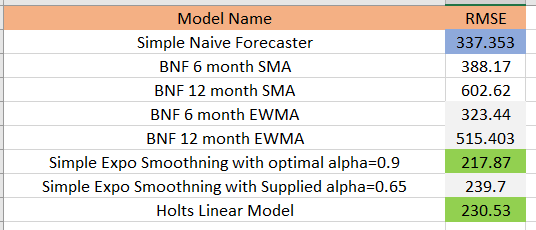

<AxesSubplot:xlabel='Date'>

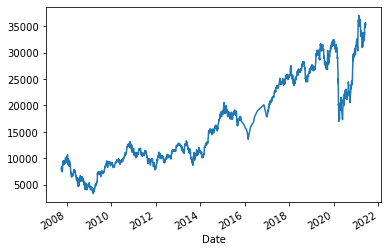

In [159]:
Level_df = fit11.level
Level_df.plot()

## Computing ACF & PACF

In [160]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

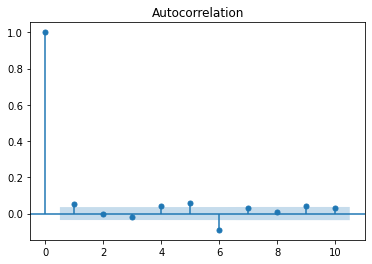

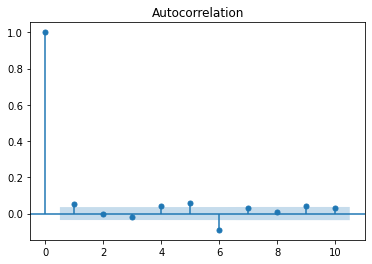

In [161]:
plot_acf((df_stationary), lags=10,alpha=0.05)

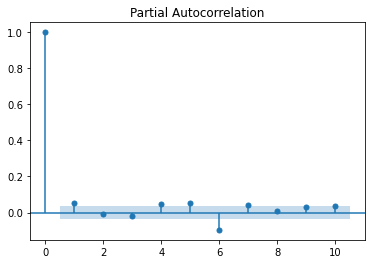

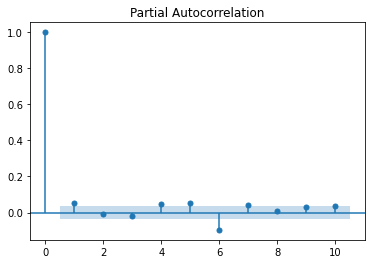

In [162]:
plot_pacf(df_stationary,lags=10,alpha=0.05)

Since both the PACF and ACF charts are tailing off after 1st lag, ARMA would be the best fit model as per the graphs
but we will compare the model Performance w.r.t AR and MA models also

From Above PACF we gets the P = 1 and q=1

Text(0.5, 1.0, 'Additive Decomposition')

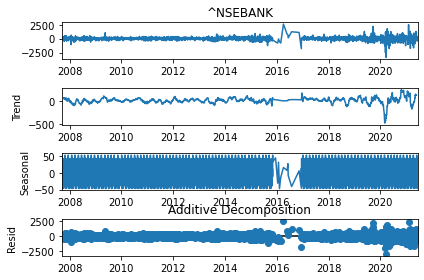

In [163]:
decomp_A = seasonal_decompose(df_stationary,model='Additive',period=30)
decomp_A.plot()
plt.title('Additive Decomposition')

Text(0.5, 1.0, 'Additive Decomposition')

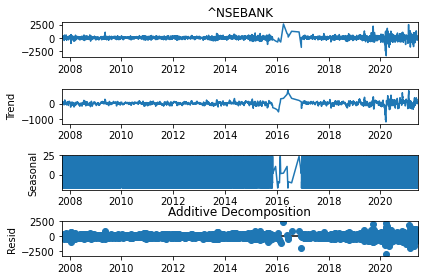

In [164]:
decomp_A = seasonal_decompose(df_stationary,model='Additive',period=7)
decomp_A.plot()
plt.title('Additive Decomposition')

In [111]:
decomp_M = seasonal_decompose(df_stationary,model='multiplicative',period=30)
decomp_M.plot()
plt.title('Multiplicative Decomposition')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

## Autoregression Models

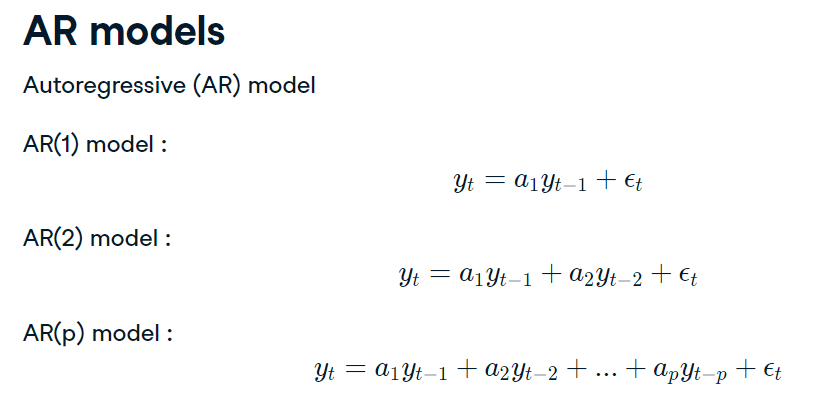

In [98]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [99]:
mod_AR = ARMA(df_stationary,order=(1,0))

In [100]:
model_AR = AutoReg(df_stationary, 5, old_names=False).fit()
res = mod_AR.fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:               ^NSEBANK   No. Observations:                 3009
Model:                     ARMA(1, 0)   Log Likelihood              -21455.323
Method:                       css-mle   S.D. of innovations            302.307
Date:                Tue, 03 Aug 2021   AIC                          42916.646
Time:                        11:37:13   BIC                          42934.674
Sample:                             0   HQIC                         42923.130
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3680      5.812      1.612      0.107      -2.024      20.760
ar.L1.^NSEBANK     0.0519      0.018      2.848      0.004       0.016       0.088
                                    

No handles with labels found to put in legend.


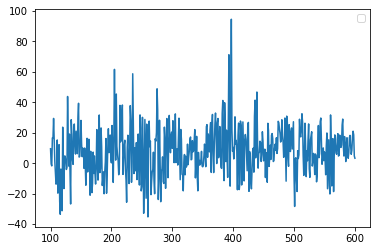

In [59]:
#plot_predict visualizes forecasts. Here we produce a large number of forecasts which show the string seasonality captured by the model.
p_Pred = res.plot_predict(100,600)

## plot_diagnositcs indicates that the model captures the key features in the data.

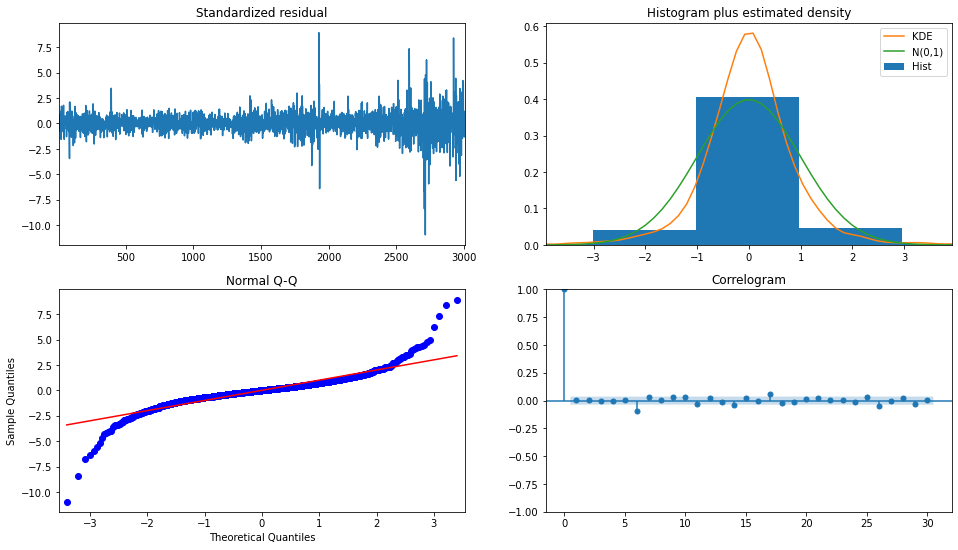

In [60]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

## MA


In [104]:
mod_MA = ARMA(df_stationary,order=(0,1))

In [105]:
model_MA = AutoReg(df_stationary, 5, old_names=False).fit()
res = mod_MA.fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:               ^NSEBANK   No. Observations:                 3009
Model:                     ARMA(0, 1)   Log Likelihood              -21455.288
Method:                       css-mle   S.D. of innovations            302.304
Date:                Tue, 03 Aug 2021   AIC                          42916.576
Time:                        12:10:40   BIC                          42934.604
Sample:                             0   HQIC                         42923.059
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3680      5.799      1.615      0.106      -1.998      20.734
ma.L1.^NSEBANK     0.0522      0.018      2.868      0.004       0.017       0.088
                                    

## Autoregressive Moving Average (ARMA)

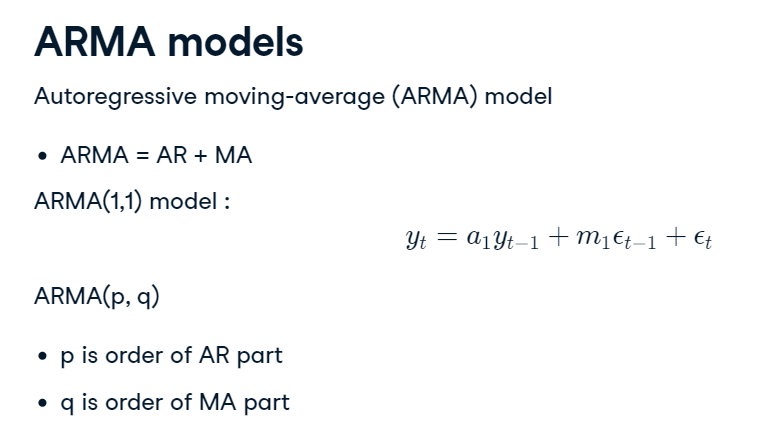

In [68]:
arma_mod = ARIMA(df_stationary, order=(1,0,1)).fit()

In [69]:
print(arma_mod.params)

const         9.367963
ar.L1        -0.032609
ma.L1         0.084705
sigma2    91464.680835
dtype: float64


In [94]:
res = arma_mod
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               ^NSEBANK   No. Observations:                 3009
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21455.288
Date:                Tue, 03 Aug 2021   AIC                          42918.575
Time:                        11:33:06   BIC                          42942.613
Sample:                             0   HQIC                         42927.220
                               - 3009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3680      5.880      1.593      0.111      -2.157      20.893
ar.L1         -0.0326      0.154     -0.211      0.833      -0.335       0.270
ma.L1          0.0847      0.153      0.552      0.5

No handles with labels found to put in legend.


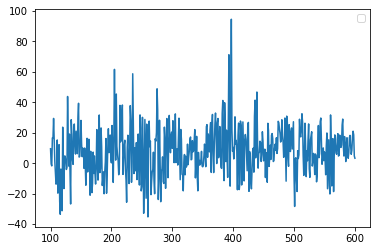

In [74]:
#plot_predict visualizes forecasts. Here we produce a large number of forecasts which show the string seasonality captured by the model.
p_Pred = res.plot_predict(100,600)

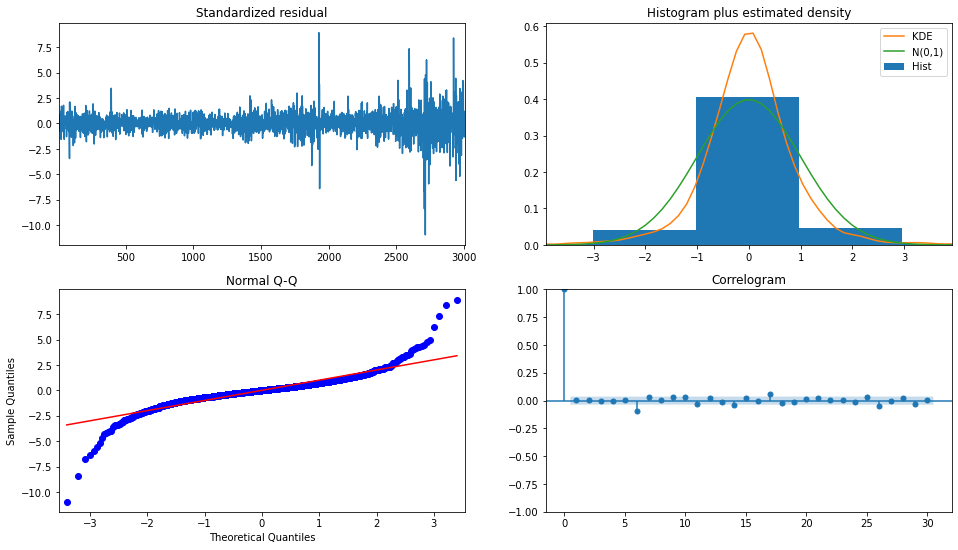

In [75]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

## ARIMA

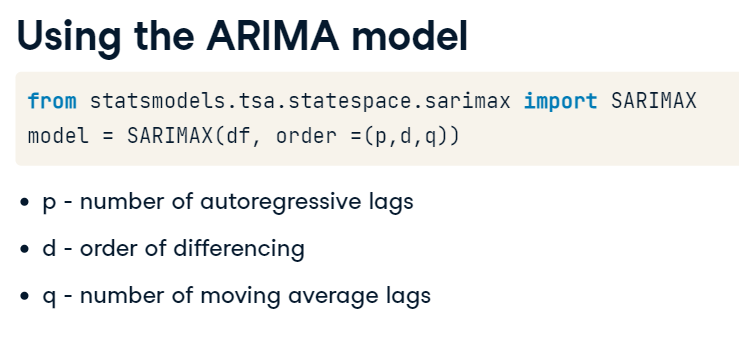

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [88]:
model = SARIMAX(df_stationary, order=(1,2,1)).fit()

In [93]:
res = model
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               ^NSEBANK   No. Observations:                 3009
Model:               SARIMAX(1, 2, 1)   Log Likelihood              -22035.830
Date:                Tue, 03 Aug 2021   AIC                          44077.660
Time:                        11:32:09   BIC                          44095.686
Sample:                             0   HQIC                         44084.143
                               - 3009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4704      0.007    -66.864      0.000      -0.484      -0.457
ma.L1         -1.0000      0.317     -3.150      0.002      -1.622      -0.378
sigma2      1.354e+05   4.28e+04      3.164      0.0

# ARMAX

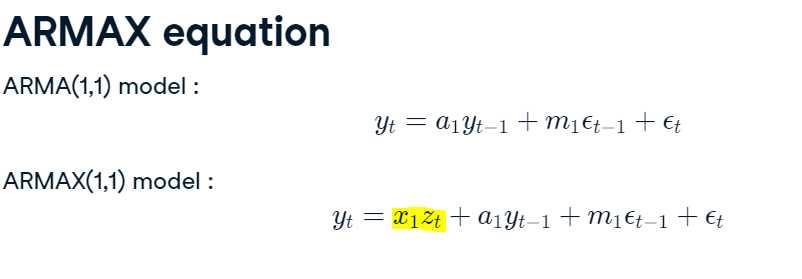

In [154]:
model = SARIMAX(df_corr["BNF_open"], order=(1,1,1),exog = df_corr["DJI_close"] ).fit()

In [155]:
res = model
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               BNF_open   No. Observations:                 2629
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -18965.139
Date:                Tue, 03 Aug 2021   AIC                          37938.279
Time:                        14:41:54   BIC                          37961.775
Sample:                             0   HQIC                         37946.787
                               - 2629                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DJI_close      0.2213      0.013     16.780      0.000       0.195       0.247
ar.L1         -0.1372      0.204     -0.672      0.501      -0.537       0.263
ma.L1          0.0857      0.203      0.423      0.6

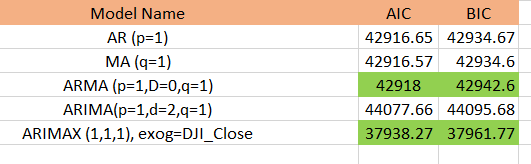